# DEEP TRANSFER LEARNING
Pemanfaatan Deep Transfer Learning Mode 1

In [4]:
#Import library yang dibutuhkan
from keras.applications.vgg16 import VGG16

#Deklarasikan model yang akan dipakai
model = VGG16()

#Tampilkan layer-layer model VGG16
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

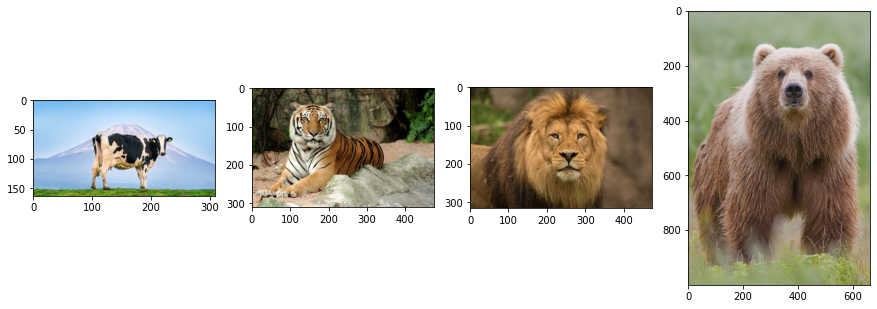

(4, 224, 224, 3)


In [7]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls = []
urls.append("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSAYoNVMHvziwYUujmmPHX7hwr6cGNpCkUn5A&usqp=CAU")
urls.append("https://th.bing.com/th/id/OIP.khv7-y6dTU7qb88vRcU6wwHaE3?pid=ImgDet&rs=1")
urls.append("https://th.bing.com/th/id/OIP.x3JQ6-bC1n3kixIPDFpFoAHaE8?pid=ImgDet&rs=1")
urls.append("https://upload.wikimedia.org/wikipedia/commons/7/79/2010-brown-bear.jpg")


imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (224,224)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
    
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array 
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

In [8]:
yh = model.predict(imgs)
for i in range(len(urls)):
    if(np.argmax(yh[i]) == 291):
       print("Singa")
    elif(np.argmax(yh[i]) == 292) :
      print("Harimau")
    elif(np.argmax(yh[i]) >= 294 and np.argmax(yh[i]) <=297) :
      print("Beruang")
    else:
      print("Bukan Singa, Harimau, atau beruang")

Bukan Singa, Harimau, atau beruang
Harimau
Singa
Beruang


daftar kelas dilihat di
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a